# (Manual) Fairification pipeline for a provided (Mockup) sample dataset pretending to be representative data reflecting clinical study data on subjects with a Glioblastoma diagnosis

## This is jupyter notebook. The first cells below are to load relevent libraries and set certain preferences.
### Load libraries

In [53]:
import pandas as pd
from rdflib import Namespace, Graph, URIRef, Literal, BNode
from rdflib.namespace import DCTERMS, DC, XSD, RDFS, DCAT, RDF, FOAF
import os
import urllib.parse
from datetime import datetime
import uuid
import graphviz
from ShExJSG import Schema, ShExC, ShExJ
from ShExJSG.ShExJ import Shape, IRIREF, TripleConstraint, NodeConstraint, ShapeOr, EachOf, ShapeExternal, ShapeDecl, Annotation, ObjectLiteral

### Filename and schema visualization conventions

In [54]:
filename = 'Sample clinical data_July 2022.xlsx'

symbol = dict()
symbol["class"] = "oval"
symbol["datatype"] = "octagon"
symbol["literal"] = "rectangle"
symbol["uri"]="diamond"
symbol["bnode"]='point'
symbol["oneof"]='record'

### Namespaces

In [55]:
rdf = Graph()
WD = Namespace("http://www.wikidata.org/entity/")
WDT = Namespace("http://www.wikidata.org/prop/direct/")
SUBJECT = Namespace("http://subjects.semscape.org/")

OBO = Namespace("http://purl.obolibrary.org/obo/")
rdf.bind("obo", "http://purl.obolibrary.org/obo/")
SCHEMA = Namespace("https://schema.org/")
SIO = Namespace("http://semanticscience.org/resource/")
NODE = Namespace("http://idr.semscape.org/nodeURI/")
EFO = Namespace("http://www.ebi.ac.uk/efo/")
LABSITE = Namespace("http://labsite.semscape.org/")
CLINICALSITE = Namespace("http://clinicalsite.semscape.org/")

### Schema of file meta data
The code in the cell below defines the schema


START= @<primarydata>
<primarydata> {
    (  <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> [ <http://www.w3.org/ns/dcat#Dataset> ] ;
       <http://purl.org/dc/terms/format> [ <http://www.wikidata.org/entity/Q63082925> ]
       // <http://www.w3.org/2000/01/rdf-schema#label>"Office Open XML Spreadsheet Document"@en ;
       <http://www.w3.org/2000/01/rdf-schema#label> <http://www.w3.org/2001/XMLSchema#string> ;
       <http://purl.org/dc/terms/issued> <http://www.w3.org/2001/XMLSchema#dateTime> ;
       <http://purl.org/dc/terms/modified> <http://www.w3.org/2001/XMLSchema#dateTime>
    )
}




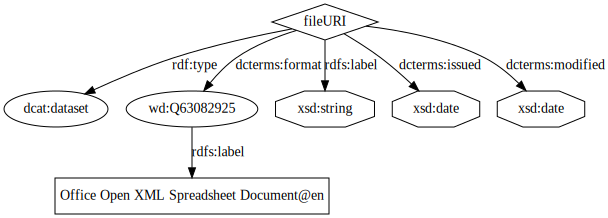

In [56]:
fileURI = URIRef("https://g-68f8be.81de.36fe.data.globus.org/Pages/Sample%20clinical%20data_July%202022.xlsx")
schema = graphviz.Digraph(filename, filename=filename+'.gv')
# graphviz
schema.attr('node', shape=symbol["uri"])
schema.node('fileURI')
schema.attr('node', shape=symbol["class"])
schema.node('dcatdataset', label='dcat:dataset')
schema.node('Q63082925', label='wd:Q63082925')
schema.attr('node', shape=symbol["literal"])
schema.node('Office Open XML Spreadsheet Document@en')
schema.attr('node', shape='octagon')
schema.node('filename', label='xsd:string')
schema.node('filedatecreated', label='xsd:date')
schema.node('filedatemodified', label='xsd:date')
schema.edge('fileURI', 'dcatdataset', label='rdf:type')
schema.edge('fileURI', 'Q63082925', label='dcterms:format')
schema.edge('Q63082925', 'Office Open XML Spreadsheet Document@en', label='rdfs:label')
schema.edge('fileURI', 'filename', label="rdfs:label")
schema.edge('fileURI', 'filedatecreated', label="dcterms:issued")
schema.edge('fileURI', 'filedatemodified', label="dcterms:modified")

# ShEx
dataexpressions = []
dataexpressions.append(TripleConstraint(predicate=IRIREF(RDF.type),valueExpr=NodeConstraint(values=[DCAT.Dataset])))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.format),valueExpr=NodeConstraint(values=[IRIREF(WD.Q63082925)]), annotations=[Annotation(RDFS.label,ObjectLiteral("Office Open XML Spreadsheet Document", language="en"))]))
dataexpressions.append(TripleConstraint(predicate=IRIREF(RDFS.label), valueExpr=NodeConstraint(datatype=XSD.string)))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.issued), valueExpr=NodeConstraint(datatype=XSD.dateTime)))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.modified), valueExpr=NodeConstraint(datatype=XSD.dateTime)))
# RDF
rdf.add((fileURI, RDF.type, DCAT.Dataset))
rdf.add((fileURI, DCTERMS.format, WD.Q63082925))
rdf.add((WD.Q63082925, RDFS.label, Literal("Office Open XML Spreadsheet Document", lang="en")))
rdf.add((fileURI, RDFS.label, Literal(filename, datatype=XSD.string)))
datecreated = os.path.getctime(filename)
rdf.add((fileURI, DCTERMS.issued, Literal(datetime.fromtimestamp(datecreated).strftime('%Y-%m-%dT%H:%M:%SZ'), datatype=XSD.dateTime)))
datemodified = os.path.getmtime(filename)
rdf.add((fileURI, DCTERMS.modified, Literal(datetime.fromtimestamp(datemodified).strftime('%Y-%m-%dT%H:%M:%SZ'), datatype=XSD.dateTime)))

gbm1 = Schema()
gbm1.shapes = [Shape(id="primarydata", expression=EachOf(expressions=dataexpressions))]
gbm1.start = "primarydata"


print(str(ShExC(gbm1)))
schema

### Load (mockup) data

In [57]:
pd.set_option('display.max_columns', None)
xls = pd.ExcelFile(filename)
subjects = pd.read_excel(xls)
subjects

,ID Lab site,ID clinical site,DOB,Age,Gender,Pathology,Localization,IDH1/2 status,MGMT status,ECOG,Nature of initial resection,lymphocyte counts at V1 in G/L,cummulative dose preV1 steroid use in mg,steroid use after V1,cummulative steroid dose in mg,Cycles adj TMZ,doses bevacizumab,Best response,pseudo-progression (1=yes 0=no),œdema,PP or œdema,progression (1=yes 0=no),date of progression,months PFS,deceased (1=yes 0=no),months OS
0,Ge 829,DAG,1953-05-16,62,F,GBM,parietal R,wt,UnMeth,1,biopsy,0.69,5420,no,5420.0,2,12,PD,0,1,1,1,2013-11-11,3,1,19
1,Ge 835,EAG,1964-06-18,50,M,GBM,temporal D,wt,UnMeth,0,subtot,1.05,12,yes,506.5,3,0,PD,1,1,1,1,2014-01-21,6,1,10
2,Ge 849,FAG,1957-12-15,57,F,GBM,frontal R,wt,UnMeth,0,subtot,0.64,0,yes,404.0,6,9,PD,1,0,1,1,2014-09-02,11,1,18
3,Ge 852,GAG,1960-03-22,55,M,GBM,fronto insular L,wt,UnMeth,0,subtot,2.10,0,yes,260.0,6,16,SD,0,1,1,1,2014-10-01,11,1,21
4,Ge 882,IAG,1948-05-06,67,M,GBM,fronto insular R,wt,UnMeth,0,subtot,0.68,0,yes,240.0,6,4,PD,0,1,1,1,2014-12-22,18,1,24
5,Ge 893*,KAG,1958-07-12,56,M,GBM,temporal R,wt,Meth,0,subtot,1.05,0,no,0.0,6,0,SD,0,0,0,1,2015-02-04,26,0,44
6,Ge 901,LAG,1991-06-09,23,F,AIII,fronto temporal insular R,mut,UnMeth,0,subtot,0.99,0,no,0.0,6,29,SD,1,0,1,1,2016-07-18,17,1,37
7,Ge 904,MAG,1949-10-13,65,M,GBM,parieto occipital L,wt,Meth,0,subtot,1.67,0,no,0.0,6,6,PR,1,1,1,1,2016-12-12,29,1,35
8,Ge 939,PAG,1972-04-10,43,F,AIII,temporal R,wt,UnMeth,1,biopsy,1.37,0,no,0.0,2,42,PD,1,1,1,1,2015-06-12,6,1,32
9,Ge 941*,OAG,1954-01-07,61,M,GBM,frontal L,mut,Meth,0,subtot,0.94,0,no,0.0,6,0,CR,1,0,1,0,NaT,38,0,38


# Schema modelling

## care provider
The data contains two collumns capturing institutional codes. On for the lab site and one for the clinical site. These fields are named `ID Lab site` and `ID clinical site`. In the schema model these fields are used to build a unique identifier for the subject. Since multiple subjects can exist with the same lab site and clinical site combination. A random and unique number is generated to add to the lab and clinical site combination, to create a unique identifier for the subject.

### URI
To complete the Uniform Resource Identifier (URI), we have a minted a temporary namespace `http://subjects.semscape.org/`. Currently, given it is mockup data, this is fine,moving forward a final namespace needs to be selected.

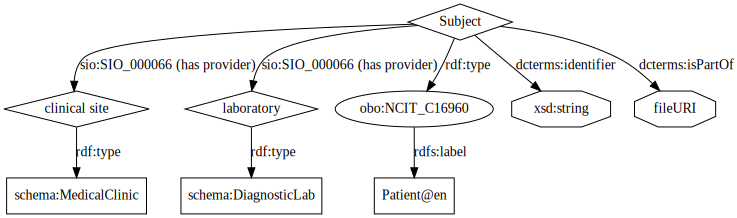

In [58]:
def add2graphviz(command=None, arg1=None, arg2=None, shape=None, label=None):
    if command == "attr":
        localviz.attr(arg1, shape=shape)
        schema.attr(arg1, shape=shape)
    if command == "node":
        localviz.node(arg1,label=label)
        schema.node(arg1,label=label)
    if command == "edge":
        localviz.edge(arg1, arg2, label=label)
        schema.edge(arg1, arg2, label=label)

localviz = graphviz.Digraph()

# uri
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
# nodes
add2graphviz(command='node', arg1='subject', label="Subject")
add2graphviz(command='node', arg1='clinicalsite', label="clinical site")
add2graphviz(command='node', arg1='laboratory', label="laboratory")
# classes
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
# nodes
add2graphviz(command='node', arg1= 'NCIT_C16960', label='obo:NCIT_C16960')
# Literals
add2graphviz(command='attr', arg1='node', shape=symbol["literal"])
# nodes
add2graphviz(command='node', arg1= 'NCIT_C16960Label', label='Patient@en')
add2graphviz(command='node', arg1='schemaDiagnosticLab', label='schema:DiagnosticLab')
add2graphviz(command='node', arg1='clinicalMedicalClinic', label='schema:MedicalClinic')
# datatypes
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
# nodes
add2graphviz(command='node', arg1= 'iddatatype', label='xsd:string')

#edges
add2graphviz(command='edge', arg1='subject', arg2='fileURI',label="dcterms:isPartOf")
add2graphviz(command='edge', arg1='subject', arg2='NCIT_C16960', label='rdf:type')
add2graphviz(command='edge', arg1='NCIT_C16960', arg2='NCIT_C16960Label', label='rdfs:label')
add2graphviz(command='edge', arg1='subject', arg2='iddatatype', label='dcterms:identifier')
add2graphviz(command='edge', arg1='subject', arg2='clinicalsite', label="sio:SIO_000066 (has provider)")

add2graphviz(command='edge', arg1='clinicalsite', arg2='clinicalMedicalClinic', label="rdf:type")
add2graphviz(command='edge', arg1='subject', arg2='laboratory', label="sio:SIO_000066 (has provider)")
add2graphviz(command='edge', arg1='laboratory', arg2='schemaDiagnosticLab', label="rdf:type")

localviz

## Subjectproperties

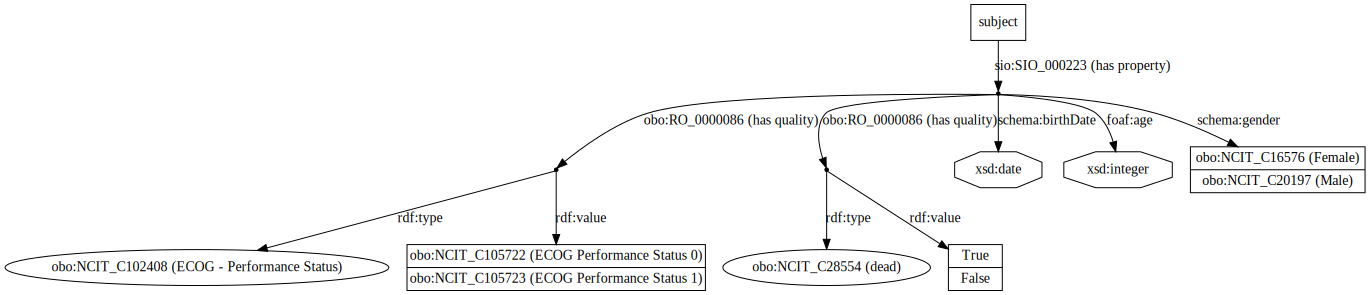

In [59]:
localviz = graphviz.Digraph()

# bnode
add2graphviz(command='attr', arg1='node', shape=symbol["bnode"])
add2graphviz(command='node', arg1='subjectproperties')
add2graphviz(command='node', arg1='ecog')
add2graphviz(command='node', arg1='deceased')
# class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
## nodes
add2graphviz(command='node', arg1='NCIT_C102408', label="obo:NCIT_C102408 (ECOG - Performance Status)")
add2graphviz(command='node', arg1='NCIT_C28554', label="obo:NCIT_C28554 (dead)")
# datatypes
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
## nodes
add2graphviz('node', arg1='dob', label="xsd:date")
add2graphviz('node', arg1='age', label='xsd:integer')

# oneof
add2graphviz(command='attr', arg1='node', shape=symbol['oneof'])
## nodes
add2graphviz(command='node', arg1='gender', label="{ obo:NCIT_C16576 (Female) | obo:NCIT_C20197 (Male) }")
add2graphviz(command='node', arg1='ecogs', label="{ obo:NCIT_C105722 (ECOG Performance Status 0) | obo:NCIT_C105723 (ECOG Performance Status 1) }") # https://github.com/German-BioImaging/dtplatform/issues/17
add2graphviz(command='node', arg1='deceasedvalue', label='{True | False}')

# edges
add2graphviz(command='edge', arg1='subject', arg2='subjectproperties',label="sio:SIO_000223 (has property)")
add2graphviz(command='edge', arg1='subjectproperties', arg2='dob', label="schema:birthDate")
add2graphviz(command='edge', arg1='subjectproperties', arg2='age', label="foaf:age")
add2graphviz(command='edge', arg1='subjectproperties', arg2='gender',label="schema:gender")
add2graphviz(command='edge', arg1='subjectproperties', arg2='ecog', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='ecog', arg2='NCIT_C102408', label="rdf:type")
add2graphviz(command='edge', arg1='ecog', arg2='ecogs', label='rdf:value')
add2graphviz(command='edge', arg1='subjectproperties', arg2='deceased', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='deceased', arg2='NCIT_C28554', label='rdf:type')
add2graphviz(command='edge', arg1='deceased', arg2='deceasedvalue', label="rdf:value")

localviz

# Pathology

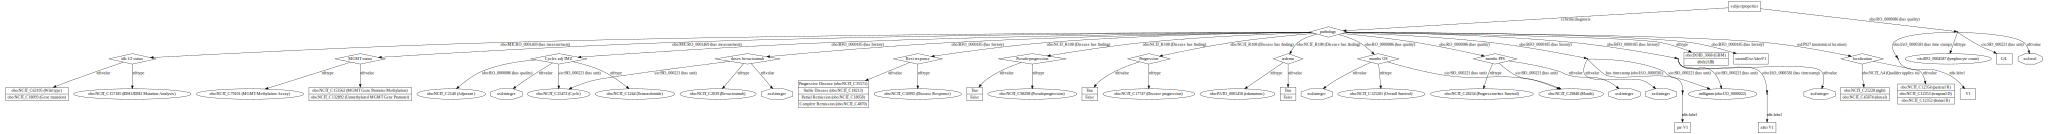

In [60]:
localviz = graphviz.Digraph()

# bnode
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
## nodes
add2graphviz(command='node', arg1='pathology', label="pathology")
add2graphviz(command='node', arg1='localization', label="localization")
add2graphviz(command='node', arg1='idh12status', label="idh 1/2 status" )
add2graphviz(command='node', arg1='mgmtstatus', label="MGMT status")
add2graphviz(command='node', arg1='adjTMZ', label="Cycles adj TMZ")
add2graphviz(command='node', arg1='dosesbevacizumab', label='doses bevacizumab')
add2graphviz(command='node', arg1='bestresponse', label='Best response')
add2graphviz(command='node', arg1='pseudoprogression', label='Pseudo-progression ')
add2graphviz(command='node', arg1='progression', label='Progression')
add2graphviz(command='node', arg1='œdema', label='œdema')
add2graphviz(command='node', arg1='osurv', label="months OS")
add2graphviz(command='node', arg1='pfs', label="months PFS")

add2graphviz(command='attr', arg1='node', shape=symbol["bnode"])
add2graphviz(command='node', arg1='lymphcounts')
add2graphviz(command='node', arg1='lymphcountsTS')
add2graphviz(command='node', arg1='steroidPreV1')
add2graphviz(command='node', arg1='steroidPreV1TS')
add2graphviz(command='node', arg1='steroidAfterV1')
add2graphviz(command='node', arg1='steroidAfterV1TS')

# class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
# nodes
add2graphviz(command='node', arg1='NCIT_C157185', label="obo:NCIT_C157185 (IDH1/IDH2 Mutation Analysis)")
add2graphviz(command='node', arg1='NCIT_C79101', label="obo:NCIT_C79101 (MGMT Methylation Assay)")
add2graphviz(command='node', arg1='NCIT_C1244', label="obo:NCIT_C1244 (Temozolomide)")
add2graphviz(command='node', arg1='NCIT_C2140', label="obo:NCIT_C2140 (Adjuvant )")
add2graphviz(command='node', arg1='NCIT_C25472', label="obo:NCIT_C25472 (Cycle)")
add2graphviz(command='node', arg1='NCIT_C2039', label='obo:NCIT_C2039 (Bevacizumab)')
add2graphviz(command='node', arg1='NCIT_C50995', label='obo:NCIT_C50995 (Disease Response)')
add2graphviz(command='node', arg1='NCIT_C98298', label='obo:NCIT_C98298 (Pseudoprogression)')
add2graphviz(command='node', arg1="NCIT_C17747", label='obo:NCIT_C17747 (Disease progression)')
add2graphviz(command='node', arg1='PATO_0001450', label='obo:PATO_0001450 (edamatous)')
add2graphviz(command='node', arg1='NCIT_C125201', label='obo:NCIT_C125201 (Overall Survival)')
add2graphviz(command='node', arg1='NCIT_C28234', label='obo:NCIT_C28234 (Progression-free Survival)')
add2graphviz(command='node', arg1='NCIT_C29846', label='obo:NCIT_C29846 (Month)')
add2graphviz(command='node', arg1='EFO_0004587', label='efo:EFO_0004587 (lymphocyte count)')
add2graphviz(command='node', arg1='UO_0000022', label="milligram (obo:UO_0000022)")

# literal
add2graphviz(command='attr', arg1='node', shape=symbol["literal"])
# nodes
add2graphviz(command='node', arg1='lnV1', label='V1')
add2graphviz(command='node', arg1='GperL', label="G/L")
add2graphviz(command='node', arg1='steroidpreV1Label', label="pre V1")
add2graphviz(command='node', arg1='steroidAfterV1Label', label="after V1")

# datatypes
add2graphviz(command='attr', arg1='node', shape=symbol["datatype"])
add2graphviz(command='node', arg1='Cycles adj TMZ', label="xsd:integer")
add2graphviz(command='node', arg1='dosesbevacizumabvalue', label="xsd:integer")
add2graphviz(command='node', arg1='osurvvalues', label='xsd:integer')
add2graphviz(command='node', arg1='pfsvalues', label='xsd:integer')
add2graphviz(command='node', arg1='lncvalue', label='xsd:real')
add2graphviz(command='node', arg1='steroidpreV1Dose', label="xsd:integer")
add2graphviz(command='node', arg1='steroidafterV1Dose',label="xsd:integer" )

# oneof
add2graphviz(command='attr', arg1='node', shape=symbol['oneof'])
## nodes
add2graphviz(command='node', arg1='diseases', label="{ obo:DOID_3068 (GBM) | (tbd) (AIII) }")
add2graphviz(command='node', arg1='localizations', label="{ obo:NCIT_C12354 (parietal R) | obo:NCIT_C12353 (temporal D) | obo:NCIT_C12352 (frontal R) }")
add2graphviz(command='node', arg1='orientations', label="{obo:NCIT_C25228 (right) | obo:NCIT_C45874 (dorsal) }")
add2graphviz(command='node', arg1='wtmut', label="{ obo:NCIT_C62195 (Wild type) | obo:NCIT_C18093 (Gene mutation) }")
add2graphviz(command='node', arg1='meth',label="{ obo:NCIT_C153562 (MGMT Gene Promoter Methylation) | obo:NCIT_C132892 (Unmethylated MGMT Gene Promoter) }")
add2graphviz(command='node', arg1='disresponses', label='{ Progressive Disease  (obo:NCIT_C35571) | Stable Disease (obo:NCIT_C18213) | Partial Remission (obo:NCIT_C18058) | Complete Remission (obo:NCIT_C4870) }')
add2graphviz(command='node', arg1='pseudoprogressionvalue', label='{True | False}')
add2graphviz(command='node', arg1='progressionvalue', label='{True | False}')
add2graphviz(command='node', arg1='œdemavalue', label='{True | False}')

# edges
add2graphviz(command='edge', arg1='subjectproperties', arg2='pathology',label="schema:diagnosis")
add2graphviz(command='edge', arg1='pathology', arg2='diseases',label="rdf:type")
add2graphviz(command='edge', arg1='pathology', arg2='localization', label="wd:P927 (anatomical location)")
add2graphviz(command='edge', arg1='localization', arg2='localizations', label="rdf:value")
add2graphviz(command='edge', arg1='localization', arg2='orientations', label='obo:NCIT_A4 (Qualifier applies to)')
add2graphviz(command='edge', arg1='pathology', arg2='idh12status', label="obo:MICRO_0001469 (has measurement)")
add2graphviz(command='edge', arg1='idh12status', arg2='NCIT_C157185', label="rdf:type")
add2graphviz(command='edge', arg1='idh12status', arg2='wtmut', label='rdf:value')
add2graphviz(command='edge', arg1='pathology', arg2='mgmtstatus', label="obo:MICRO_0001469 (has measurement)")
add2graphviz(command='edge', arg1='mgmtstatus', arg2='NCIT_C79101', label="rdf:type")
add2graphviz(command='edge', arg1='mgmtstatus', arg2='meth', label='rdf:value')
add2graphviz(command='edge', arg1='pathology', arg2='adjTMZ',label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='adjTMZ', arg2='Cycles adj TMZ', label='rdf:value')
add2graphviz(command='edge', arg1='adjTMZ', arg2='NCIT_C1244',label='rdf:type')
add2graphviz(command='edge', arg1='adjTMZ', arg2='NCIT_C25472', label='sio:SIO_000221 (has unit)')
add2graphviz(command='edge', arg1='adjTMZ', arg2='NCIT_C2140', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='pathology', arg2='dosesbevacizumab', label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='dosesbevacizumab', arg2='NCIT_C2039', label="rdf:type")
add2graphviz(command='edge', arg1='dosesbevacizumab', arg2='dosesbevacizumabvalue', label="rdf.value" )
add2graphviz(command='edge', arg1='dosesbevacizumab', arg2='NCIT_C25472', label="sio:SIO_000221 (has unit)")
add2graphviz(command='edge', arg1='pathology', arg2='bestresponse', label="obo:NCIT_R108 (Disease has finding)")
add2graphviz(command='edge', arg1='bestresponse',arg2='NCIT_C50995',label = "rdf:type")
add2graphviz(command='edge', arg1='bestresponse', arg2='disresponses', label="rdf:value")
add2graphviz(command='edge', arg1='pseudoprogression', arg2='NCIT_C98298', label="rdf:type")
add2graphviz(command='edge', arg1='pseudoprogression', arg2='pseudoprogressionvalue', label="rdf:value")
add2graphviz(command='edge', arg1='pathology', arg2='pseudoprogression', label="obo:NCIT_R108 (Disease has finding)")
add2graphviz(command='edge', arg1='pathology', arg2='progression', label="obo:NCIT_R108 (Disease has finding)")
add2graphviz(command='edge', arg1='progression', arg2='NCIT_C17747', label='rdf:type')
add2graphviz(command='edge', arg1='pathology', arg2='œdema', label="obo:NCIT_R108 (Disease has finding)")
add2graphviz(command='edge', arg1='progression', arg2='progressionvalue', label="rdf:value")
add2graphviz(command='edge', arg1='œdema', arg2='PATO_0001450', label="rdf:type")
add2graphviz(command='edge', arg1='œdema', arg2='œdemavalue', label='rdf:value')
add2graphviz(command='edge', arg1='pathology', arg2='osurv', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='pathology', arg2='pfs', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='osurv', arg2='NCIT_C125201', label='rdf:type')
add2graphviz(command='edge', arg1='pfs', arg2='NCIT_C28234', label='rdf:type')
add2graphviz(command='edge', arg1='osurv', arg2='osurvvalues', label="rdf:value")
add2graphviz(command='edge', arg1='pfs', arg2='pfsvalues', label="rdf:value")
add2graphviz(command='edge', arg1='osurv', arg2='NCIT_C29846', label="sio:SIO_000221 (has unit)")
add2graphviz(command='edge', arg1='pfs', arg2='NCIT_C29846', label="sio:SIO_000221 (has unit)")
add2graphviz(command='edge', arg1='subjectproperties', arg2='lymphcounts', label="obo:RO_0000086 (has quality)")
add2graphviz(command='edge', arg1='lymphcounts', arg2='EFO_0004587',label="rdf:type" )
add2graphviz(command='edge', arg1='lymphcounts', arg2='lymphcountsTS', label='obo:IAO_0000581 (has time stamp)')
add2graphviz(command='edge', arg1='lymphcountsTS', arg2='lnV1', label='rdfs:label')
add2graphviz(command='edge', arg1='lymphcounts', arg2='GperL', label='sio:SIO_000221 (has unit)')
add2graphviz(command='edge', arg1='lymphcounts', arg2='lncvalue', label="rdf:value")
add2graphviz(command='edge', arg1='pathology', arg2='steroidPreV1', label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='steroidPreV1', arg2='steroidPreV1TS', label="has timestamp (obo:IAO_0000581)")
add2graphviz(command='edge', arg1='steroidPreV1TS', arg2='steroidpreV1Label', label="rdfs:label")
add2graphviz(command='edge', arg1='steroidPreV1', arg2='UO_0000022',label="sio:SIO_000221 (has unit)")
add2graphviz(command='edge', arg1='steroidPreV1', arg2='steroidpreV1Dose', label="rdf:value" )
add2graphviz(command='edge', arg1='pathology', arg2='steroidUseAfterV1', label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='steroidAfterV1', arg2='steroidAfterV1TS', label="obo:IAO_0000581 (has timestamp)")
add2graphviz(command='edge', arg1='pathology', arg2='steroidAfterV1', label="obo:BFO_0000185 (has history)")
add2graphviz(command='edge', arg1='steroidAfterV1TS', arg2='steroidAfterV1Label', label="rdfs:label")
add2graphviz(command='edge', arg1='steroidAfterV1', arg2='UO_0000022',label="sio:SIO_000221 (has unit)" )
add2graphviz(command='edge', arg1='steroidAfterV1', arg2='steroidafterV1Dose', label="rdf:value")

localviz.view()
localviz

# Archived specimen

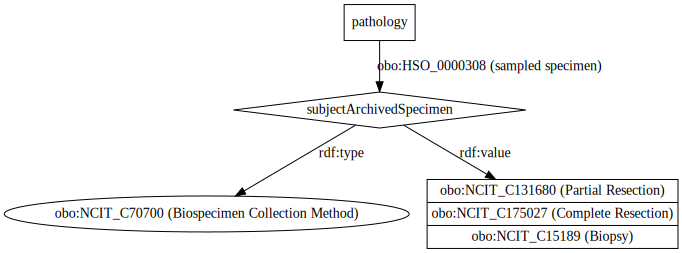

In [61]:
localviz = graphviz.Digraph()
# bnode
add2graphviz(command='attr', arg1='node', shape=symbol["uri"])
## nodes
add2graphviz(command='node', arg1='subjectArchivedSpecimen')
#class
add2graphviz(command='attr', arg1='node', shape=symbol["class"])
## nodes
add2graphviz(command='node', arg1='NCIT_C70700', label="obo:NCIT_C70700 (Biospecimen Collection Method)")
# oneof
add2graphviz(command='attr', arg1='node', shape=symbol['oneof'])
## nodes
add2graphviz(command='node', arg1='initialresection', label="{ obo:NCIT_C131680 (Partial Resection) | obo:NCIT_C175027 (Complete Resection) | obo:NCIT_C15189 (Biopsy)}")


# edges
add2graphviz(command='edge', arg1='pathology', arg2='subjectArchivedSpecimen', label="obo:HSO_0000308 (sampled specimen)")
add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='NCIT_C70700', label="rdf:type")
add2graphviz(command='edge', arg1='subjectArchivedSpecimen', arg2='initialresection', label='rdf:value')

localviz.view()
localviz

# RDF generation

In [62]:
for index, row in subjects.iterrows():
    # Row Subject
    idLabSite = urllib.parse.quote(row["ID Lab site"])
    idClinicalSite = urllib.parse.quote(row["ID clinical site"])
    randomID = uuid.uuid4().hex
    mockSubjectId = idLabSite+"/"+idClinicalSite +"/"+randomID
    rdf.add((SUBJECT["/"+mockSubjectId], DCTERMS.isPartOf, fileURI))
    rdf.add((SUBJECT["/"+mockSubjectId], RDF.type, OBO.NCIT_C16960))
    rdf.add((OBO.NCIT_C16960, RDFS.label, Literal("Patient", lang="en")))
    rdf.add((SUBJECT["/"+mockSubjectId], DCTERMS.identifier, Literal(randomID, datatype=XSD.string)))
    # Clinical site
    rdf.add((CLINICALSITE[idClinicalSite], RDF.type, SCHEMA.MedicalClinic))
    rdf.add((SUBJECT["/"+mockSubjectId], SIO.SIO_000066, CLINICALSITE[idClinicalSite]))
    rdf.add((SIO.SIO_000066, RDFS.label, Literal("has provider", lang="en")))
    # Lab site
    rdf.add((LABSITE[idLabSite], RDF.type, SCHEMA.DiagnosticLab))
    rdf.add((SUBJECT["/"+mockSubjectId], SIO.SIO_000066, LABSITE[idLabSite]))

    subjectProperties = BNode()
    rdf.add((SUBJECT["/"+mockSubjectId], SIO.SIO_000223, subjectProperties))
    rdf.add((SIO.SIO_000223, RDFS.label, Literal("has property", lang="en")))

    # DOB
    rdf.add((subjectProperties, SCHEMA.birthDate, Literal(row["DOB"], datatype=XSD.date)))
    rdf.add((subjectProperties, FOAF.age, Literal(row["Age "], datatype=XSD.int)))

    # Gender
    if row["Gender"] == "M":
        rdf.add((subjectProperties, SCHEMA.gender, OBO.NCIT_C20197))
    if row["Gender"] == "F":
        rdf.add((subjectProperties, SCHEMA.gender, OBO.NCIT_C16576))

    # Pathology
    pathology = BNode()
    if row["Pathology"] == "GBM":
        rdf.add((subjectProperties, SCHEMA.diagnosis, pathology))
        rdf.add((pathology, RDF.type, OBO.DOID_3068))
    #if row["Pathology"] == "AIII":
    #    g.add((subjectProperties, SCHEMA.diagnosis, ))

    # Localization
    if row["Localization "] == "parietal R":
        localization = BNode()
        rdf.add((pathology, WD.P927, localization))
        rdf.add((localization, RDF.type, OBO.NCIT_C12354))
        rdf.add((localization, OBO.NCIT_A4, OBO.NCIT_C25228))
        rdf.add((OBO.NCIT_A4, RDFS.label, Literal("Qualifier Applies To", lang="en")))
        rdf.add((OBO.NCIT_C25228, RDFS.label, Literal("Right", lang="en")))

    if row["Localization "] == "temporal D":
        localization = BNode()
        rdf.add((pathology, WD.P927, localization))
        rdf.add((localization, RDF.type, OBO.NCIT_C12353))
        rdf.add((localization, OBO.NCIT_A4, OBO.NCIT_C45874))
        rdf.add((OBO.NCIT_C45874, RDFS.label, Literal("Dorsal", lang="en")))

    if row["Localization "] == "frontal R":
        localization = BNode()
        rdf.add((pathology, WD.P927, localization))
        rdf.add((localization, RDF.type, OBO.NCIT_C12352))
        rdf.add((localization, OBO.NCIT_A4, OBO.NCIT_C25228))

    # IDH1/2 status
    idh12status = BNode()
    rdf.add((pathology, OBO.MICRO_0001469, idh12status))
    rdf.add((OBO.MICRO_0001469, RDFS.label, Literal("has measurement", lang="en")))
    rdf.add((idh12status, RDF.type,OBO.NCIT_C157185))
    rdf.add((OBO.NCIT_C157185, RDFS.label, Literal("IDH1/IDH2 Mutation Analysis", lang="en")))
    if row["IDH1/2 status"] == "wt":
        rdf.add((idh12status, RDF.value, OBO.NCIT_C62195))
        rdf.add((OBO.NCIT_C62195, RDFS.label, Literal("Wild Type", lang="en")))
    if row["IDH1/2 status"] == "mut":
        rdf.add((idh12status, RDF.value, OBO.NCIT_C18093))
        rdf.add((OBO.NCIT_C18093, RDFS.label, Literal("Gene Mutation", lang="en")))

    # MGMT status
    mgmtstatus = BNode()
    rdf.add((pathology, OBO.MICRO_0001469, mgmtstatus))
    rdf.add((mgmtstatus, RDF.type,OBO.NCIT_C79101))
    rdf.add((OBO.NCIT_C79101, RDFS.label, Literal("MGMT Methylation Assay", lang="en")))
    if row["MGMT status"] == "Meth":
        rdf.add((idh12status, RDF.value, OBO.NCIT_C153562))
        rdf.add((OBO.NCIT_C153562, RDFS.label, Literal("MGMT Gene Promoter Methylation", lang="en")))
    if row["MGMT status"] == "UnMeth":
        rdf.add((idh12status, RDF.value, OBO.NCIT_C132892))
        rdf.add((OBO.NCIT_C132892, RDFS.label, Literal("Unmethylated MGMT Gene Promoter", lang="en")))

    # ECOG
    ecog = BNode()
    rdf.add((subjectProperties, OBO.RO_0000086, ecog))
    rdf.add((OBO.RO_0000086, RDFS.label, Literal("has quality", lang="en")))
    rdf.add((ecog, RDF.type, OBO.NCIT_C102408))
    rdf.add((OBO.NCIT_C102408, RDFS.label, Literal("ECOG - Performance Status", lang="en")))
    if row["ECOG"] == 0:
        rdf.add((ecog, RDF.value, OBO.NCIT_C105722))
        rdf.add((OBO.NCIT_C105722, RDF.value, Literal("ECOG Performance Status 0", lang="en")))
    if row["ECOG"] == 1:
        rdf.add((ecog, RDF.value, OBO.NCIT_C105723))
        rdf.add((OBO.NCIT_C105723, RDF.value, Literal("ECOG Performance Status 1", lang="en")))

    # Nature of initial resection
    subjectArchivedSpecimen = BNode()
    rdf.add((pathology, OBO.HSO_0000308 , subjectArchivedSpecimen))
    rdf.add((OBO.HSO_0000308, RDFS.label, Literal("sampled specimen", lang="en")))
    rdf.add((subjectArchivedSpecimen, RDF.type, OBO.NCIT_C70700))
    rdf.add((OBO.NCIT_C70700, RDFS.label, Literal("Biospecimen Collection Method", lang="en")))
    if row["Nature of initial resection "]=="subtot":
        rdf.add((subjectArchivedSpecimen, RDF.value, OBO.NCIT_C131680))
        rdf.add((OBO.NCIT_C131680, RDFS.label, Literal("Partial Resection")))
    if row["Nature of initial resection "]=="total":
        rdf.add((subjectArchivedSpecimen, RDF.value, OBO.NCIT_C175027))
        rdf.add((OBO.NCIT_C175027, RDFS.label, Literal("Complete Resection")))
    if row["Nature of initial resection "]=="biopsy":
        rdf.add((subjectArchivedSpecimen, RDF.value, OBO.NCIT_C15189))
        rdf.add((OBO.NCIT_C175027, RDFS.label, Literal("Biopsy")))

    # lymphocyte counts at V1 in G/L
    lymphcounts = BNode()
    rdf.add((pathology, OBO.MICRO_0001469, lymphcounts))
    rdf.add((lymphcounts, RDF.type, EFO.EFO_0004587))
    rdf.add((EFO.EFO_0004587, RDFS.label, Literal("lymphocyte count", lang="en")))
    lymphcountTS = BNode()
    rdf.add((lymphcounts, OBO.IAO_0000581,lymphcountTS))
    rdf.add((OBO.IAO_0000581, RDFS.label, Literal("has time stamp", lang="en")))
    rdf.add((lymphcountTS, RDFS.label, Literal("V1", datatype=XSD.string)))
    rdf.add((lymphcounts, SIO.SIO_000221, Literal("G/L", datatype=XSD.string)))
    rdf.add((lymphcounts, RDF.value, Literal(row["lymphocyte counts at V1 in G/L"], datatype=XSD.float)))

    # cummulative dose preV1 steroid use in mg
    steroidUsePreV1 =BNode()
    rdf.add((pathology, OBO.BFO_0000185, steroidUsePreV1))
    rdf.add((OBO.BFO_0000185, RDFS.label, Literal("has history", lang="en")))
    steroidUsePreV1TS = BNode()
    rdf.add((steroidUsePreV1, OBO.IAO_0000581, steroidUsePreV1TS))
    rdf.add((steroidUsePreV1TS, RDFS.label, Literal("Pre V1", datatype=XSD.string)))
    rdf.add((steroidUsePreV1, SIO.SIO_000221, OBO.UO_0000022))
    rdf.add((steroidUsePreV1, RDF.value, Literal(row["cummulative dose preV1 steroid use in mg"], datatype=XSD.integer)))
    rdf.add((steroidUsePreV1, RDF.type, OBO.NCIT_C81246))
    rdf.add((OBO.NCIT_C81246, RDFS.label, Literal("Drug Use History", lang="en")))
    rdf.add((steroidUsePreV1, RDFS.range, OBO.CHEBI_35341))
    rdf.add((OBO.CHEBI_35341, RDFS.label, Literal("steroid", lang="en")))

    # steroid use after V1
    steroidUse =BNode()
    rdf.add((pathology, OBO.BFO_0000185, steroidUse))
    rdf.add((OBO.BFO_0000185, RDFS.label, Literal("has history", lang="en")))
    rdf.add((steroidUse, SIO.SIO_000221, OBO.UO_0000022))
    if row["steroid use after V1"]=="yes":
        rdf.add((steroidUse, RDF.value, Literal(True, datatype=XSD.boolean)))
    else:
        rdf.add((steroidUse, RDF.value, Literal(False, datatype=XSD.boolean)))
    rdf.add((steroidUse, RDF.type, OBO.NCIT_C81246))
    rdf.add((OBO.NCIT_C81246, RDFS.label, Literal("drug use history")))
    rdf.add((steroidUse, RDFS.range, OBO.CHEBI_35341))
    rdf.add((OBO.CHEBI_35341, RDFS.label, Literal("steroid", lang="en")))

    #  Cycles adj TMZ
    adjTMZ = BNode()
    rdf.add((pathology, OBO.BFO_0000185, adjTMZ ))
    rdf.add((adjTMZ, RDF.type, OBO.NCIT_C1244))
    rdf.add((OBO.NCIT_C1244, RDFS.label, Literal("Temozolomide", lang="en")))
    rdf.add((adjTMZ, RDF.value, Literal(row[" Cycles adj TMZ"], datatype=XSD.integer)))
    rdf.add((adjTMZ, SIO.SIO_000221, OBO.NCIT_C25472))
    rdf.add((adjTMZ, OBO.RO_0000086, OBO.NCIT_C2140))
    rdf.add((OBO.NCIT_C2140, RDFS.label, Literal("Adjuvant")))
    rdf.add((OBO.NCIT_C25472, RDFS.label, Literal("Cycle")))

    # doses bevacizumab
    dosesbevacizumab = BNode()
    rdf.add((pathology, OBO.BFO_0000185, dosesbevacizumab))
    rdf.add((dosesbevacizumab, RDF.type, OBO.NCIT_C2039))
    rdf.add((OBO.NCIT_C2039, RDFS.label, Literal("Bevacizumab", lang="en")))
    rdf.add((dosesbevacizumab, SIO.SIO_000221, OBO.NCIT_C25472))
    rdf.add((OBO.NCIT_C25472, RDFS.label, Literal("Cycle", lang="en")))
    rdf.add((dosesbevacizumab, RDF.value, Literal(row["doses bevacizumab"], datatype=XSD.integer)))

    # Best response
    bestresponse = BNode()
    rdf.add((pathology, OBO.NCIT_R108, bestresponse))
    rdf.add((OBO.NCIT_R108, RDFS.label, Literal("Disease_Has_Finding", lang="en")))
    rdf.add((bestresponse, RDF.type, OBO.NCIT_C50995))
    rdf.add((OBO.NCIT_C50995, RDFS.label, Literal("Disease Response", lang="en")))
    if row["Best response"] == "PD":
        rdf.add((bestresponse, RDF.value, OBO.NCIT_C35571))
        rdf.add((OBO.NCIT_C35571, RDFS.label, Literal("Progressive Disease", lang="en")))
    if row["Best response"] == "SD":
        rdf.add((bestresponse, RDF.value, OBO.NCIT_C18213))
        rdf.add((OBO.NCIT_C18213, RDFS.label, Literal("Stable Disease", lang="en")))
    if row["Best response"] == "PR":
        rdf.add((bestresponse, RDF.value, OBO.NCIT_C18058))
        rdf.add((OBO.NCIT_C18058, RDFS.label, Literal("Partial Remission", lang="en")))
    if row["Best response"] == "CR":
        rdf.add((bestresponse, RDF.value, OBO.NCIT_C4870))
        rdf.add((OBO.NCIT_C4870, RDFS.label, Literal("Complete Remission", lang="en")))

    # Pseudoprogression

    pseudoprogression = BNode()
    rdf.add((pathology, OBO.NCIT_R108, pseudoprogression))
    rdf.add((pseudoprogression, RDF.type, OBO.NCIT_C98298))
    rdf.add((OBO.NCIT_C98298, RDFS.label, Literal("Pseudoprogression", lang="en")))
    if row["pseudo-progression (1=yes 0=no)"]==1:
        rdf.add((pseudoprogression, RDF.value, Literal(True, datatype=XSD.boolean)))
    if row["pseudo-progression (1=yes 0=no)"]==0:
        rdf.add((pseudoprogression, RDF.value, Literal(False, datatype=XSD.boolean)))

    # œdema
    oedema = BNode()
    rdf.add((pathology, OBO.NCIT_R108, oedema))
    rdf.add((oedema, RDF.type, OBO.PATO_0001450))
    rdf.add((OBO.PATO_0001450, RDFS.label, Literal("edamatous", lang="en")))
    if row["œdema"]==1:
        rdf.add((oedema, RDF.value, Literal(True, datatype=XSD.boolean)))
    if row["œdema"]==0:
        rdf.add((oedema, RDF.value, Literal(False, datatype=XSD.boolean)))

    # progression
    progression = BNode()
    rdf.add((pathology, OBO.NCIT_R108, progression))
    rdf.add((progression, RDF.type, OBO.NCIT_C17747))
    rdf.add((OBO.NCIT_C17747, RDFS.label, Literal("Disease progression", lang="en")))
    if row["progression (1=yes 0=no)"]==1:
        rdf.add((progression, RDF.value, Literal(True, datatype=XSD.boolean)))
    if row["progression (1=yes 0=no)"]==0:
        rdf.add((progression, RDF.value, Literal(False, datatype=XSD.boolean)))

    # deceased (1=yes 0=no)
    deceased = BNode()
    rdf.add((subjectProperties, OBO.RO_0000086, deceased))
    rdf.add((deceased, RDF.type, OBO.NCIT_C28554))
    rdf.add((OBO.NCIT_C28554, RDFS.label, Literal("Dead", lang="en")))
    if row["deceased (1=yes 0=no)"]==1:
        rdf.add((deceased, RDF.value, Literal(True, datatype=XSD.boolean)))
    if row["deceased (1=yes 0=no)"]==0:
        rdf.add((deceased, RDF.value, Literal(False, datatype=XSD.boolean)))

    # months OS
    osurv = BNode()
    rdf.add((pathology, OBO.NCIT_R108, osurv))
    rdf.add((osurv, RDF.type, OBO.NCIT_C125201))
    rdf.add((OBO.NCIT_C125201, RDFS.label, Literal("Overall Survival", lang="en")))
    rdf.add((osurv, RDF.value, Literal(row["months OS"], datatype=XSD.integer)))
    rdf.add((osurv, SIO.SIO_000221, OBO.NCIT_C29846))
    rdf.add((OBO.NCIT_C29846, RDFS.label, Literal("Month", lang="en")))

    # months months PFS
    pfs = BNode()
    rdf.add((pathology, OBO.NCIT_R108, pfs))
    rdf.add((pfs, RDF.type, OBO.NCIT_C28234))
    rdf.add((OBO.NCIT_C28234, RDFS.label, Literal("Progression-free Survival", lang="en")))
    rdf.add((pfs, RDF.value, Literal(row["months PFS"], datatype=XSD.integer)))
    rdf.add((pfs, SIO.SIO_000221, OBO.NCIT_C29846))
    rdf.add((OBO.NCIT_C29846, RDFS.label, Literal("Month", lang="en")))

In [63]:
print(rdf.serialize(destination=filename+".ttl", format="turtle"))
print(rdf.serialize(format="turtle"))

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'Memory']].
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ns1: <http://semanticscience.org/resource/> .
@prefix ns2: <http://www.wikidata.org/entity/> .
@prefix obo: <http://purl.obolibrary.org/obo/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

obo:BFO_0000185 rdfs:label "has history"@en .

obo:HSO_0000308 rdfs:label "sampled specimen"@en .

obo:IAO_0000581 rdfs:label "has time stamp"@en .

obo:MICRO_0001469 rdfs:label "has measurement"@en .

obo:NCIT_A4 rdfs:label "Qualifier Applies To"@en .

obo:NCIT_R108 rdfs:label "Disease_Has_Finding"@en .

obo:RO_0000086 rdfs:label "has quality"@en .

ns1:SIO_000066 rdfs:label "has provider"@en .

ns1:SIO_000223 rdfs:label "has pro

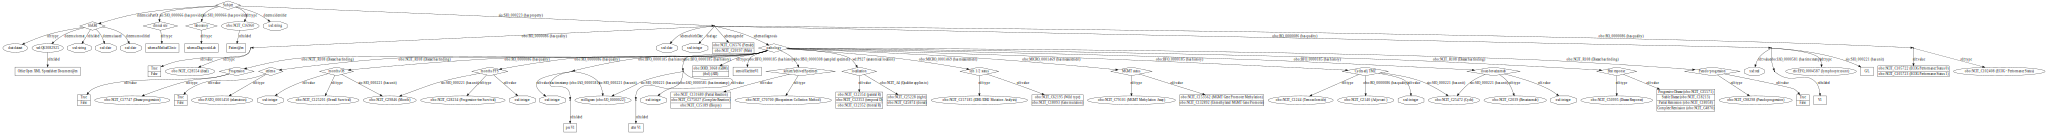

In [64]:
schema.view()
schema

# ShEx design

In [65]:
dataexpressions = []
dataexpressions.append(TripleConstraint(predicate=IRIREF(RDF.type),valueExpr=NodeConstraint(values=[DCAT.Dataset])))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.format),valueExpr=NodeConstraint(values=[IRIREF(WD.Q63082925)]), annotations=[Annotation(RDFS.label,ObjectLiteral("Office Open XML Spreadsheet Document", language="en"))]))
dataexpressions.append(TripleConstraint(predicate=IRIREF(RDFS.label), valueExpr=NodeConstraint(datatype=XSD.string)))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.issued), valueExpr=NodeConstraint(datatype=XSD.dateTime)))
dataexpressions.append(TripleConstraint(predicate=IRIREF(DCTERMS.modified), valueExpr=NodeConstraint(datatype=XSD.dateTime)))

In [66]:
for node in rdf.all_nodes():
    if isinstance(node, URIRef):
        try:
            rdf.parse(node)
        except:
            print(node)

http://subjects.semscape.org//Ge%20939/PAG/46ff53afcc254872a839102fa5a64cc7
http://clinicalsite.semscape.org/KAG
http://clinicalsite.semscape.org/LAG
http://labsite.semscape.org/Ge%20970
http://clinicalsite.semscape.org/IAG
http://labsite.semscape.org/Ge%20893%2A
http://subjects.semscape.org//Ge%20950/QAG/f561f083caa0480ba05fd12066ea31bb
http://subjects.semscape.org//Ge%20852/GAG/a3461461d81749c589964e28b47aef02
http://clinicalsite.semscape.org/QAG
http://subjects.semscape.org//Ge%201006/YAG/1e107b6b6e5243f5bd13329a2c6b8fa3
https://g-68f8be.81de.36fe.data.globus.org/Pages/Sample%20clinical%20data_July%202022.xlsx
http://subjects.semscape.org//Ge%20882/IAG/28e0ea8e3a9c4ff4a660c251d663f615
http://labsite.semscape.org/Ge%20849
http://purl.obolibrary.org/obo/RO_0000086
http://subjects.semscape.org//Ge%20893%2A/KAG/c08f76efa6284b18b2e06c28072ea78f
http://labsite.semscape.org/Ge%20852
http://clinicalsite.semscape.org/OAG
http://clinicalsite.semscape.org/VAG
http://labsite.semscape.org/Ge%208

# Extract schema

In [67]:
from shexer.shaper import Shaper
from shexer.consts import NT, TURTLE

q = "select ?class where { ?item rdf:type ?class }"
target_classes = []
x = rdf.query(q)
for target_class in x:
  if str(target_class["class"]) not in target_classes:
    target_classes.append(str(target_class["class"]))

shex_target_file = filename+".shex"

shaper = Shaper(target_classes=target_classes,
                rdflib_graph=rdf,
                input_format=TURTLE,
                )  # Default rdf:type
            
shaper.shex_graph(output_file=shex_target_file)


In [68]:
command = f"cat {filename}.shex"

In [69]:
!command